데이터 로드

In [24]:
import pandas as pd

ss = pd.read_csv("D:/_data/stock predict/삼성전자.csv", thousands=',', encoding='CP949')
ss = ss.drop(range(20, 1120), axis=0)
ki = pd.read_csv("D:/_data/stock predict/키움증권.csv", thousands=',', encoding='CP949')
ki = ki.drop(range(20, 1060), axis=0)

ss

,일자,시가,고가,저가,종가,전일비,Unnamed: 6,등락률,거래량,금액(백만),신용비,개인,기관,외인(수량),외국계,프로그램,외인비
0,2021/12/17,76800,78000,76800,78000,▲,200,0.26,11802494.0,914987.0,0.00,-733323,-907696,0,-257019,757837,51.78
1,2021/12/16,78500,78500,77400,77800,▲,200,0.26,11996128.0,934244.0,0.13,-442445,-261746,-105777,571543,822030,51.78
2,2021/12/15,76400,77600,76300,77600,▲,600,0.78,9584939.0,738592.0,0.14,-1118059,-654764,1095947,1946258,1706254,51.79
3,2021/12/14,76500,77200,76200,77000,▲,200,0.26,10976660.0,841447.0,0.14,198293,-1487295,1005909,804186,-132070,51.77
4,2021/12/13,77200,78300,76500,76800,▼,-100,-0.13,15038750.0,1163285.0,0.13,-181359,184966,-151301,-1388477,-606534,51.75
5,2021/12/10,77400,77600,76800,76900,▼,-1300,-1.66,9155219.0,705966.0,0.13,1797829,-1071153,-728679,-505955,-1714088,51.75
6,2021/12/09,77400,78200,77000,78200,▲,800,1.03,21604528.0,1681184.0,0.14,-1671678,-491078,2768853,2796574,3486578,51.77
7,2021/12/08,78300,78600,77100,77400,,0,0.00,21558340.0,1662979.0,0.14,-2524520,2586682,703379,-941476,48232,51.72
8,2021/12/07,76100,77700,75600,77400,▲,1100,1.44,19232453.0,1477888.0,0.14,-2997907,-547244,4216958,3518986,123462,51.71
9,2021/12/06,75100,76700,74900,76300,▲,700,0.93,16391250.0,1245309.0,0.14,-3062604,576498,2508191,2146417,2070776,51.64


데이터 전처리

In [25]:
import numpy as np
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Input, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [26]:
# 인덱스 재배열
ss = ss.loc[::-1].reset_index(drop=True)
ki = ki.loc[::-1].reset_index(drop=True)

ss

,일자,시가,고가,저가,종가,전일비,Unnamed: 6,등락률,거래량,금액(백만),신용비,개인,기관,외인(수량),외국계,프로그램,외인비
0,2021/11/22,73300,75200,73000,74900,▲,3700,5.20,27506623.0,2047228.0,0.16,-8689803,3034399,5716921,4760374,3500256,51.31
1,2021/11/23,76000,76000,74500,75300,▲,400,0.53,22029195.0,1656722.0,0.16,-2177512,-2811514,4884832,5578065,1247451,51.39
2,2021/11/24,76000,76200,74100,74800,▼,-500,-0.66,15652305.0,1174196.0,0.15,701745,-2258726,1484318,1421283,-596182,51.41
3,2021/11/25,75100,75100,73600,73700,▼,-1100,-1.47,12559258.0,929571.0,0.15,694786,-179371,-353300,-143417,-704752,51.41
4,2021/11/26,73500,74100,72000,72300,▼,-1400,-1.90,13002242.0,944378.0,0.15,1825155,-1070320,-1157622,-560900,-1313864,51.39
5,2021/11/29,71700,73000,71400,72300,,0,0.00,16682559.0,1206606.0,0.15,-2395401,3021851,-494165,-566353,-525529,51.38
6,2021/11/30,73200,73900,70500,71300,▼,-1000,-1.38,30364841.0,2183678.0,0.15,1834720,-2841806,1600552,370200,939616,51.41
7,2021/12/01,72000,74800,71600,74400,▲,3100,4.35,21954856.0,1610885.0,0.15,-6250521,415580,5498391,5601567,3706678,51.50
8,2021/12/02,73900,75800,73800,75800,▲,1400,1.88,23652940.0,1778785.0,0.15,-6603764,-164462,6327924,5789997,5214948,51.61
9,2021/12/03,75600,76000,74100,75600,▼,-200,-0.26,18330240.0,1375861.0,0.15,133267,-157689,-630400,467310,-532651,51.60


In [27]:
# 필요한 컬럼만 남겨두기
x_ss = ss.drop(['일자', '고가', '저가', '전일비', 'Unnamed: 6', '등락률', '거래량', '금액(백만)', '신용비', '개인', '기관', '외인(수량)', '외국계', '프로그램', '외인비'], axis =1)
x_ss = np.array(x_ss)
x_ki = ki.drop(['일자', '고가', '저가', '전일비', 'Unnamed: 6', '등락률', '거래량', '금액(백만)', '신용비', '개인', '기관', '외인(수량)', '외국계', '프로그램', '외인비'], axis =1)
x_ki = np.array(x_ki)

x_ss.shape

(20, 2)

In [28]:
# split 함수 정의
def split_xy(dataset, time_steps, y_column):
    x, y = list(), list()
    for i in range(len(dataset)):
        x_end_number = i + time_steps
        y_end_number = x_end_number + y_column - 1
        
        if y_end_number > len(dataset):
            break
        tmp_x = dataset[i:x_end_number, :-1]
        tmp_y = dataset[x_end_number-1:y_end_number, -1]
        x.append(tmp_x)
        y.append(tmp_y)
    return np.array(x), np.array(y)

x_ssp, y_ssp = split_xy(x_ss, 4, 2)
x_kip, y_kip = split_xy(x_ki, 4, 2)

In [29]:
# 삼성 데이터 train_test_split 적용
x1_train, x1_test, y1_train, y1_test = train_test_split(x_ssp, y_ssp, train_size=0.8, random_state=66)

# 키움 데이터 train_test_split 적용
x2_train, x2_test, y2_train, y2_test = train_test_split(x_kip, y_kip, train_size=0.8, random_state=66)

모델 구성

In [30]:
#삼성 input
input1 = Input(shape=(4, 1))
dense1_1 = LSTM(32, activation='relu')(input1)
dense1_2 = Dense(16, activation='relu')(dense1_1)
output1 = Dense(4, activation='relu')(dense1_2)

#키움 input
input2 = Input(shape=(4, 1))
dense2_1 = LSTM(32, activation='relu')(input2)
dense2_2 = Dense(16, activation='relu')(dense2_1)
output2 = Dense(4, activation='relu')(dense2_2)

#앙상블
from tensorflow.keras.layers import concatenate
merge1 = concatenate([output1, output2])

#삼성 out
output1_1 = Dense(16, activation='relu')(merge1)
output1_2 = Dense(8)(output1_1)
ss_output = Dense(1)(output1_2)

#키움 out
output2_1 = Dense(16, activation='relu')(merge1)
output2_2 = Dense(16)(output2_1)
ku_output = Dense(1)(output2_2)

model = Model(inputs=[input1, input2], outputs=[ss_output, ku_output])

In [31]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4, 1)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 4, 1)]       0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 32)           4352        input_1[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 32)           4352        input_2[0][0]                    
______________________________________________________________________________________________

컴파일 & 훈련

In [32]:
from tensorflow.keras.callbacks import EarlyStopping
model.compile(loss='mae', optimizer='adam')
es = EarlyStopping(monitor='val_loss', mode='auto', patience=20, restore_best_weights=True)
hist = model.fit([x1_train,x2_train], [y1_train, y2_train], epochs=1000, batch_size=1, 
                 validation_split=0.3, callbacks=[es])

Epoch 1/1000
8/8 [==============================] - 1s 36ms/step - loss: 182470.4844 - dense_6_loss: 76220.6250 - dense_9_loss: 106249.8516 - val_loss: 177512.3750 - val_dense_6_loss: 75075.5781 - val_dense_9_loss: 102436.7969
Epoch 2/1000
8/8 [==============================] - 0s 4ms/step - loss: 178158.4688 - dense_6_loss: 75141.8594 - dense_9_loss: 103016.6250 - val_loss: 173189.3750 - val_dense_6_loss: 73922.8359 - val_dense_9_loss: 99266.5312
Epoch 3/1000
8/8 [==============================] - 0s 4ms/step - loss: 173170.4688 - dense_6_loss: 73646.6953 - dense_9_loss: 99523.7812 - val_loss: 167579.7031 - val_dense_6_loss: 71971.8203 - val_dense_9_loss: 95607.8906
Epoch 4/1000
8/8 [==============================] - 0s 4ms/step - loss: 166620.0000 - dense_6_loss: 71203.9375 - dense_9_loss: 95416.0625 - val_loss: 159571.0625 - val_dense_6_loss: 68791.8438 - val_dense_9_loss: 90779.2188
Epoch 5/1000
8/8 [==============================] - 0s 4ms/step - loss: 156564.0312 - dense_6_loss: 

평가 & 예측

In [33]:
loss = model.evaluate([x1_test, x2_test], [y1_test, y2_test])
print('loss : ', loss)
ss_pred, ki_pred = model.predict([x1_test, x2_test])
print('예측값 : ', ss_pred[-1], ki_pred[-1])

1/1 [==============================] - 0s 244ms/step - loss: 4599.6387 - dense_6_loss: 2039.6602 - dense_9_loss: 2559.9785
loss :  [4599.638671875, 2039.66015625, 2559.978515625]
예측값 :  [77674.05] [107122.97]


In [22]:
model.save("../_save/stock_mon_cp_{}.h5".format(ss_pred[-1]))

데이터 시각화

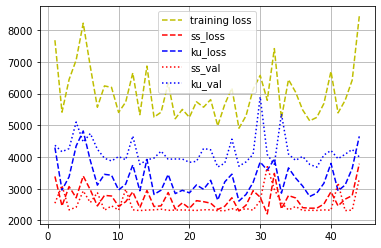

In [23]:
loss = hist.history["loss"]
ss_loss = hist.history["dense_180_loss"]
ku_loss = hist.history["dense_183_loss"]
ss_val = hist.history["val_dense_180_loss"]
ku_val = hist.history["val_dense_183_loss"]

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'y--', label="training loss")
plt.plot(epochs, ss_loss, 'r--', label="ss_loss")
plt.plot(epochs, ku_loss, 'b--', label="ku_loss")
plt.plot(epochs, ss_val, 'r:', label="ss_val")
plt.plot(epochs, ku_val, 'b:', label="ku_val")

plt.grid()
plt.legend()
plt.show()

데이터 로드

In [12]:
model = load_model("../_save/stock_mon_cp_[77204.89].h5")

loss = model.evaluate([x1_test, x2_test], [y1_test, y2_test])
print('loss : ', loss)
ss_pred, ki_pred = model.predict([x1_test, x2_test])
print('예측값 : ', ss_pred[-1], ki_pred[-1])

1/1 [==============================] - 0s 269ms/step - loss: 5301.5859 - dense_180_loss: 2287.3770 - dense_183_loss: 3014.2090
loss :  [5301.5859375, 2287.376953125, 3014.208984375]
예측값 :  [77204.89] [106666.48]
